In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

def plot_history(history, title="Model Performance"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()




Epoch 1/10


/Users/sathwik/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8642 - loss: 0.4739 - val_accuracy: 0.9817 - val_loss: 0.0573
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9815 - loss: 0.0609 - val_accuracy: 0.9844 - val_loss: 0.0481
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9878 - loss: 0.0408 - val_accuracy: 0.9883 - val_loss: 0.0363
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 0.9906 - val_loss: 0.0296
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9910 - val_loss: 0.0274
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9896 - val_loss: 0.0322
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9909 - val_loss: 0.0278
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.990

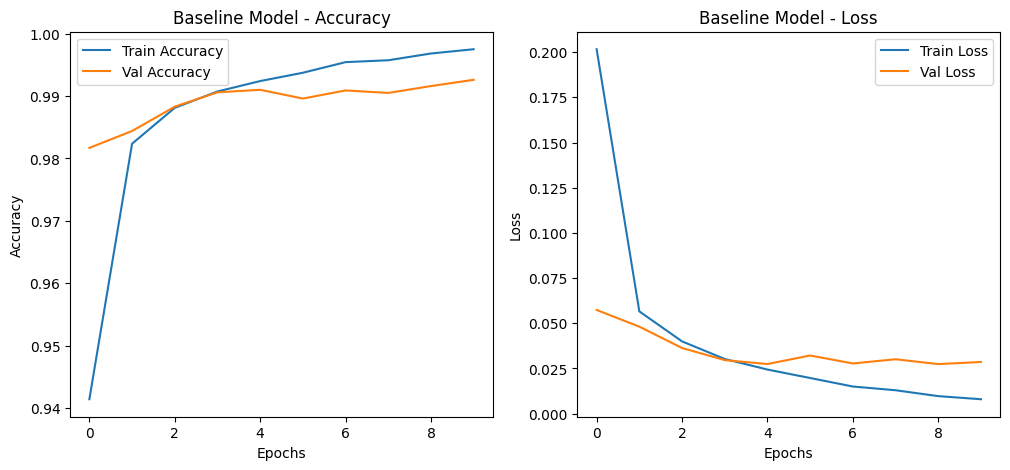

In [15]:

def create_baseline_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train baseline model (after defining the function)
baseline_model = create_baseline_model()
history_baseline = baseline_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

# Ensure the plot_history function is defined before calling it
plot_history(history_baseline, "Baseline Model")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1444 - loss: 15.0383 - val_accuracy: 0.1135 - val_loss: 2.5674
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1144 - loss: 2.5660 - val_accuracy: 0.1135 - val_loss: 2.5624
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1096 - loss: 2.5621 - val_accuracy: 0.1135 - val_loss: 2.5624
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1091 - loss: 2.5621 - val_accuracy: 0.1135 - val_loss: 2.5623
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1100 - loss: 2.5637 - val_accuracy: 0.1135 - val_loss: 2.5656
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1128 - loss: 2.5670 - val_accuracy: 0.1135 - val_loss: 2.5674
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1126 - loss: 2.5680 - val_accuracy: 0.1135 - val_loss: 2.5685
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1126 - loss: 2.5684 - val_acc

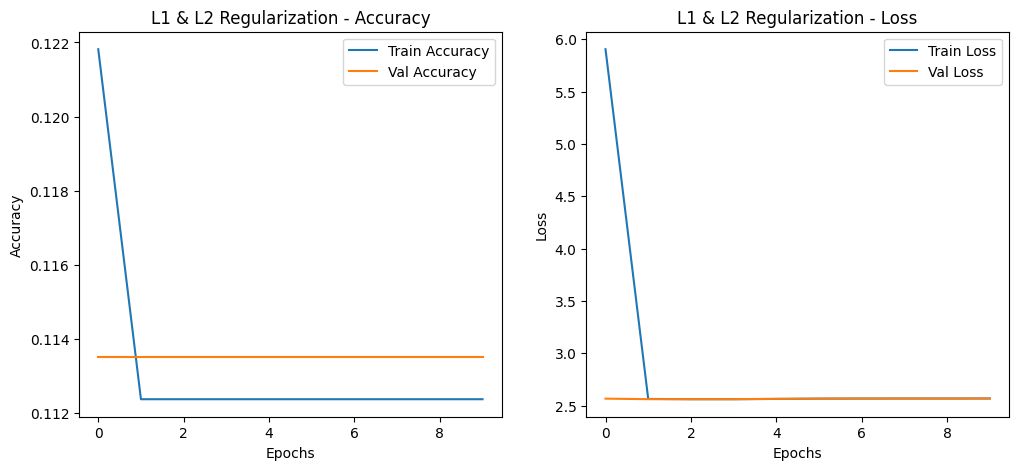

In [19]:
# L1 and L2 Regularization
def create_regularized_model(l1=0.0, l2=0.0):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1, l2), input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1, l2)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1, l2)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with L1 and L2
l1_l2_model = create_regularized_model(l1=0.01, l2=0.01)
history_l1_l2 = l1_l2_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
plot_history(history_l1_l2, "L1 & L2 Regularization")

# Dropout model
def create_dropout_model(dropout_rate=0.5):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7902 - loss: 0.6564 - val_accuracy: 0.9764 - val_loss: 0.0689
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9666 - loss: 0.1141 - val_accuracy: 0.9864 - val_loss: 0.0445
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9773 - loss: 0.0757 - val_accuracy: 0.9842 - val_loss: 0.0452
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9804 - loss: 0.0674 - val_accuracy: 0.9877 - val_loss: 0.0383
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9832 - loss: 0.0537 - val_accuracy: 0.9893 - val_loss: 0.0315
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9866 - loss: 0.0451 - val_accuracy: 0.9909 - val_loss: 0.0284
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9907 - val_loss: 0.0280
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accu

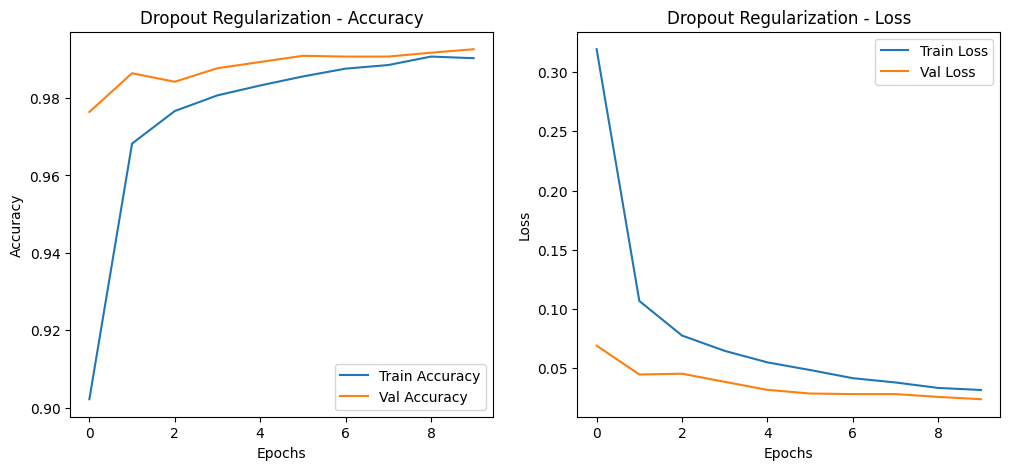

In [20]:
# Train dropout model
dropout_model = create_dropout_model(dropout_rate=0.5)
history_dropout = dropout_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
plot_history(history_dropout, "Dropout Regularization")







Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8693 - loss: 0.4633 - val_accuracy: 0.9824 - val_loss: 0.0575
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9812 - loss: 0.0594 - val_accuracy: 0.9872 - val_loss: 0.0373
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9889 - val_loss: 0.0320
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 0.9873 - val_loss: 0.0375
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9907 - val_loss: 0.0286
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9901 - val_loss: 0.0292
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9891 - val_loss: 0.0306
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accu

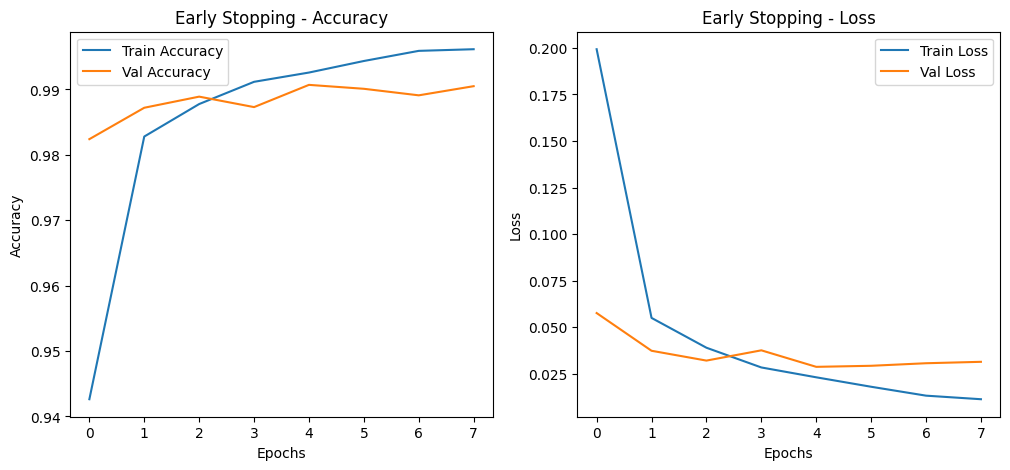

In [21]:
# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stop_model = create_baseline_model()
history_early_stop = early_stop_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128, callbacks=[early_stopping])
plot_history(history_early_stop, "Early Stopping")

Epoch 1/10


/Users/sathwik/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7545 - loss: 0.7644 - val_accuracy: 0.9811 - val_loss: 0.0579
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9562 - loss: 0.1409 - val_accuracy: 0.9851 - val_loss: 0.0449
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9685 - loss: 0.0991 - val_accuracy: 0.9871 - val_loss: 0.0421
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9763 - loss: 0.0749 - val_accuracy: 0.9862 - val_loss: 0.0393
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9806 - loss: 0.0640 - val_accuracy: 0.9911 - val_loss: 0.0258
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9835 - loss: 0.0528 - val_accuracy: 0.9908 - val_loss: 0.0280
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9832 - loss: 0.0533 - val_accuracy: 0.9906 - val_loss: 0.0274
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9855 - loss: 0.0475 - val_accuracy: 0.99

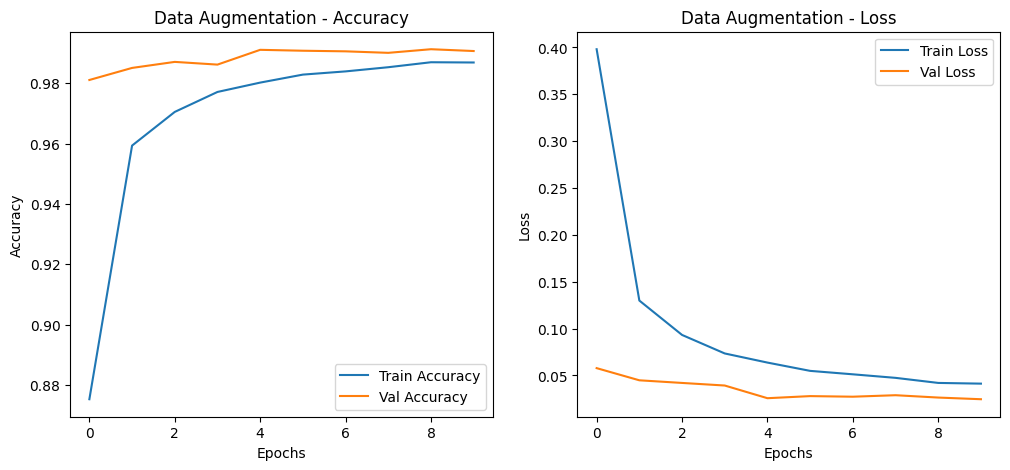

In [22]:
# Data Augmentation
data_gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False)
data_generator = data_gen.flow(x_train, y_train, batch_size=128)
data_aug_model = create_baseline_model()
history_data_aug = data_aug_model.fit(data_generator, validation_data=(x_test, y_test), epochs=10)
plot_history(history_data_aug, "Data Augmentation")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3480 - loss: nan - val_accuracy: 0.9267 - val_loss: 0.4272
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.4468 - loss: nan - val_accuracy: 0.9424 - val_loss: 0.3879
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4556 - loss: nan - val_accuracy: 0.9313 - val_loss: 0.3770
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.4551 - loss: nan - val_accuracy: 0.9357 - val_loss: 0.3549
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.4594 - loss: nan - val_accuracy: 0.9511 - val_loss: 0.3370
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4651 - loss: nan - val_accuracy: 0.9415 - val_loss: 0.3432
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4657 - loss: nan - val_accuracy: 0.9345 - val_loss: 0.3374
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4685 - loss: nan - val_accuracy: 0.9558 - val_loss

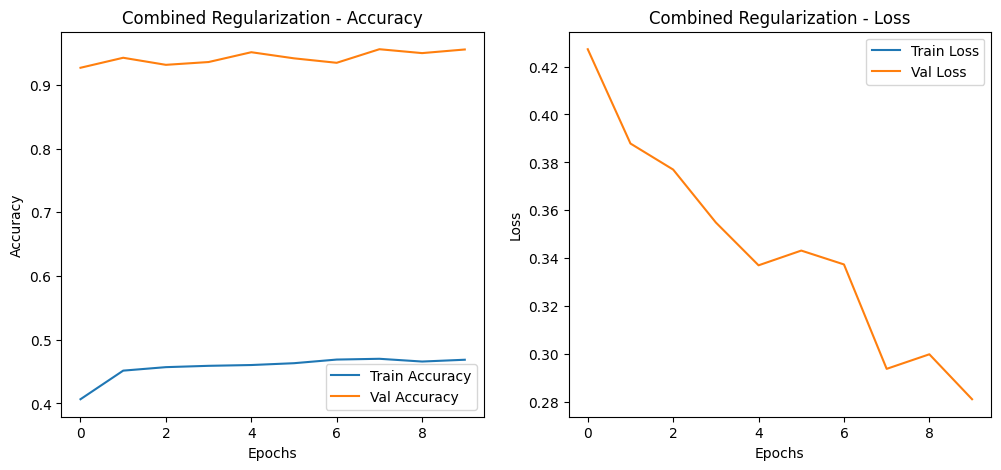

In [23]:
# Combined Regularization
combined_model = create_regularized_model(l2=0.01)
combined_model.add(layers.Dropout(0.5))
history_combined = combined_model.fit(data_generator, validation_data=(x_test, y_test), epochs=10)
plot_history(history_combined, "Combined Regularization")